# Module 7 - ML/LR Project 

# Predicting housing prices
##### An introduction into machine learning and linear regression

\
Development Team :\
\
**Laramie_Mealy**\
**Joseph_Grunklee**


# Index

- [Abstract](#Abstract)
- [1. Introduction](#1.-Introduction)
- [2. The Data](#2.-The-Data)
    - [2.1 Import the Data](#2.1-Import-the-Data)
    - [2.2 Data Exploration](#2.2-Data-Exploration)
    - [2.3 Data Preparation](#2.3-Data-Preparation)
    - [2.4 Correlation](#2.4-Correlation)
- [3. Project Description](#3.-Project-Description)
    - [3.1 Linear Regression](#3.1-Linear-Regression)
    - [3.2 Analysis](#3.2-Analysis)
    - [3.3 Results](#3.3-Results)
    - [3.4 Verify Your Model Against Test Data](#3.4-Verify-Your-Model-Against-Test-Data)
- [Conclusion](#Conclusion)
- [References](#References)

*The algorithm used in this project was that the columns with numeric data were separated from the columns containing categorical data.*  Each variable was put into a histogram to determine if it followed normal distribution.  Each variable was also put into a scatter plot to determine which variables correlated to each other.  The columns with null values were then found and plotted into a bar graph for visual purposes.  The *columns with null values greater or equal to 25% were dropped.*  **Any columns containing less than 25% null values were cleaned.**  All the variables were then displayed on a heat map to again determine which variables best correlated to SalePrice.

[Back to top](#Index)


##  Abstract

This is a brief description (150 words or less) of your analysis and results of your prediction model. Complete this portion of the template after you are done working on your project.

BEGIN 

- import libraries and data
- graph numerical columns
- handle missing values
- create correlation matrix

END\
\
BEGIN
- linear regression calculation
- construct prediction models
- plot predictions
- calculate model accuracy

END

[Back to top](#Index)


## 1. Introduction

Introduce your project using 300 words or less. Describe all the processes you followed to solve the problem and create your prediction model. Start by summarizing the steps that you intend to perform and then elaborate on this section after you have completed your project.

In this project we briefly touch upon **machine learning topics** with applied *linear regression* in an attempt to build a prediction model. We apply a simple *pearson linear regression model* to the Train data to predict the value of the dependant feature 'SalePrice' in the Test data. The prediction tool will consider models of **three different sizes**; for this exercise the models will show how the accuracy of the model changes as you adjust how many independent features you consider. **Our model has a tested r^2 value 75.79%.**

[Back to top](#Index)

## 2. The Data

For each of the steps below, make sure you include a description of your steps as well as your complete code. 

[Back to top](#Index)

### 2.1 Import the Data

**Import** the necessary **libraries** and the **data** for the project. Include any **auxiliary pandas functions** that can be used to retrieve preliminary information about your data.

Make sure to include a description of the data.

In [1]:
# here are some helpful libraries to import for this simple linear regression prediction model
import warnings 
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # For Data Visualization
import seaborn as sns # For Data Visualization
from sklearn import linear_model
from scipy import stats
from scipy.stats import norm # for scientific Computing
warnings.filterwarnings('ignore')

df_train = pd.read_csv('houseSmallData.csv') # training data will be used to build a prediction model
df_slice = df_train.iloc[0:20,:] # sometimes when there is only one set of data, we will need to use a portion of data as the training data
df_test = pd.read_csv('jtest.csv') # test data will be the data that we want to use our prediction model on

df_num_train = df_train[[col for col in df_train.columns if df_train[col].dtype=='int64']] # this created a dataframe of just numerical columns from the training data
df_str_train = df_train[[col for col in df_train.columns if df_train[col].dtype=='object']] # this created a dataframe of just catagorical columns from the training data


[Back to top](#Index)

### 2.2 Data Exploration

**Create graphs** displaying the *relationships* between the **variables** that you consider **most important** to solve the problem of **predicting housing prices.**


Include a description of the results displayed by each *plot*.

In this basic prediction model, **data cleaning** was kept to a minimum for brevity.  
1. We first looked at how the data was distributed amongst each of the *numerical features* with the help of histograms; this allowed us to identify data that is **normally distributed**.  
2. Each of the numerical features  were relationally compared to the *dependant variable* we are trying to control; here it is easy to preliminarily screen for interacting features. 
3. We looked at any gaps in our datasets, namely *null type values*, for the purpose of dropping features that are insufficiently complete from the prediction model.  
4. Following the **correlation** process, manually we drop features that are determined either vague, redundant, or otherwise unfit for the analysis.  
5. In a deeper dive of data features that contain null type data but are also sufficiently populated, the missing values may be imputed.

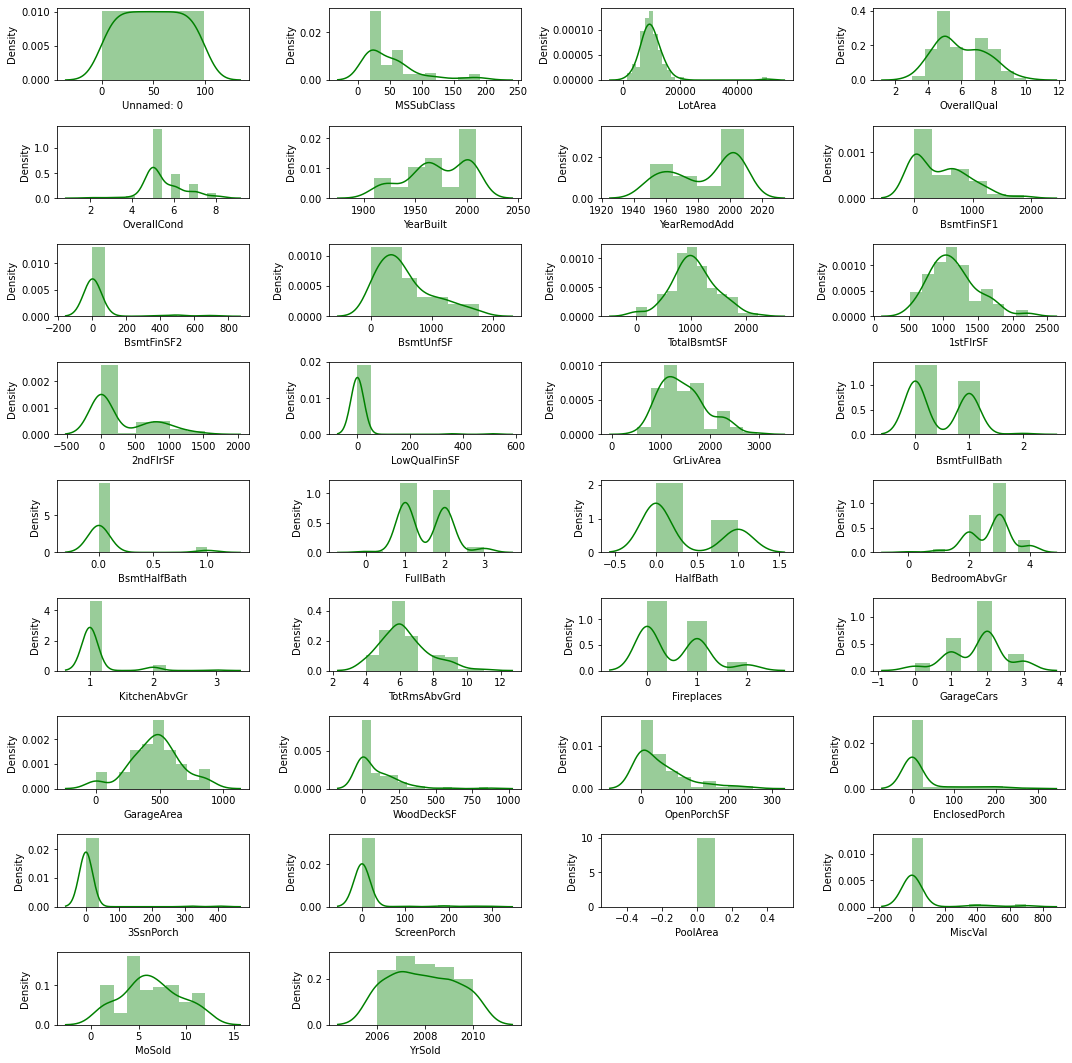

In [2]:
# Descriptive histagrams
fig=plt.subplots(figsize=(15, 21)) # sets the size (width,height) of the figure on the screen
i=0 # reset the counter
for feature in df_num_train.columns: # does for each column in the dataframe that contains only the numerical values from the training dataset
    if feature not in ['Id', 'SalePrice']: # plot each variable except 'Id' and 'SalePrice'
        i+=1 # increment the counter
        plt.subplot(13, 4, i) # subplots (rows, coumns, plot number)
        sns.distplot(df_train[feature], color='green') # this will plat histogram plots for each variable to show the spread of each data feature
        plt.tight_layout()

When we look at all of the histograms together in a screening exercise we commonly look for a few patterns to help us understand how the features are used. Firstly we look for histogram plots that contain what appears to be **normally distributed data**, that is, the plot shows us lots of bins that generally make a *bell curve*. This data is *continuous* and likely a good feature to consider for regressions. The second thing that we look for are features that have *isolated collections of values*. These graphs will look like *independent columns* of values spaced in intervals and are more likely equipped to be considered as *categorical data* in nature.

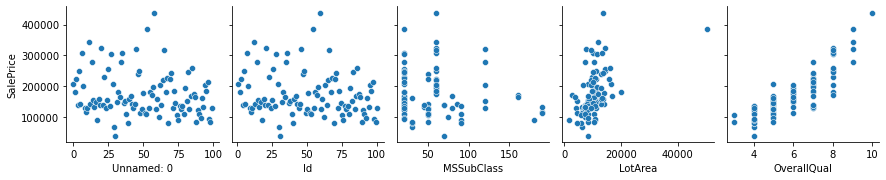

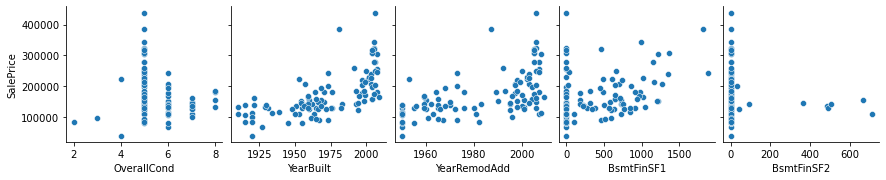

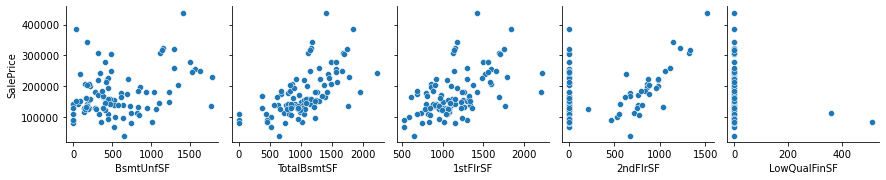

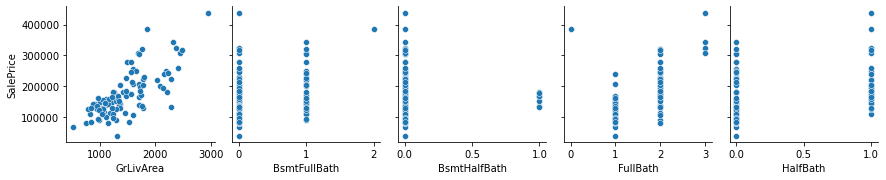

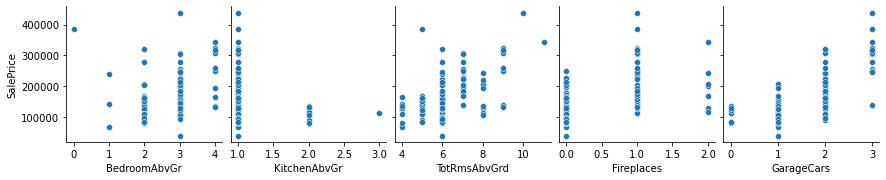

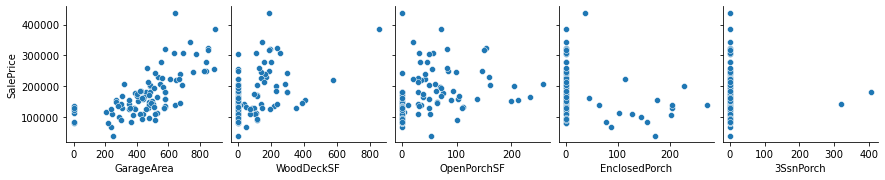

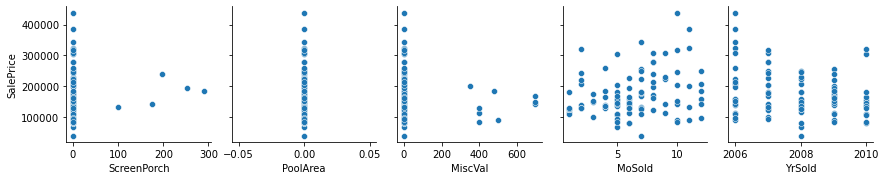

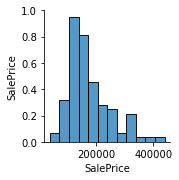

In [3]:
# Relational graphs
for i in range(0, len(df_num_train.columns),5):
    sns.pairplot(data=df_num_train, x_vars=df_num_train.columns[i:i+5], y_vars=['SalePrice'])

In each of these graphs, the Y-Axis parameter is the same **dependant variable** so that we can observe it's relation to each **independent variable** shown on the X-Axis. Now we will take a first look at the *relation* between each of the featured *numerical categories* and 'SalePrice', we are looking for patterns that would suggest a **correlation** between variables, or provide further understanding of the dataset. With **highly correlated variables** scatter plots tend to create a visual line a *consistent slope* that created from tightly clustered data points.

[Back to top](#Index)

### 2.3 Data Preparation

Determine if there are any **missing values** in the data. Did the data need to be reshaped? If yes, include a description of the steps you followed to clean the data.


In [4]:
# First check to see how many missing values are present in the training dataset
print(f'Dataset as found, has {df_train.isnull().sum().max()} null-type values')

Dataset as found, has 100 null-type values


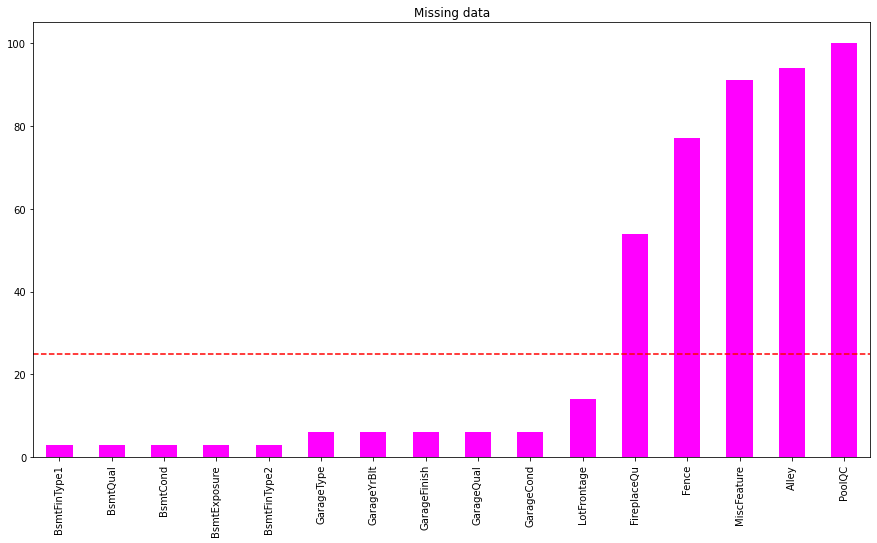

In [5]:
# handling missing data
total = df_train.isnull().sum().sort_values(ascending=False) # creates series of the sum of all null values in each column
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False) # creates series of the calculated percentages of all null values in each col compared to the total number of datapoints in the column
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) # creates a dataframe by combing the two series above
fig, ax = plt.subplots(figsize=(15,8)) # defines a figure with a single subplot and a size (w,h)
deleted_data = missing_data[missing_data['Total']>=1]['Total'].copy() # filters the dataframe for features that strictly contain at least one missing value
deleted_data.sort_values(inplace=True)
ax.set_title('Missing data')
ax = deleted_data.plot.bar(color='magenta')
plt.axhline(y=len(df_num_train)/4,color='r',ls='--')# creates a horizontal line for threshold visualization at 25% of the total number of data entries 

To help visualize the magnitude of the **missing data** and where the gaps are concentrated, a bar chart can be useful. This will allow us to quickly determine which of the features is *repairable*. Features that are missing substantial amounts of data, typically **25% or more**, it is best to ignore if possible. Features that are missing a less than critical amount of data, we can consider repairing.

[Back to top](#Index)

### 2.4 Correlation

Describe the correlation between the variables in your data. How can the correlation help you make an educated guess about how to proceed with your analysis? Will you explore different variables based on the correlation you found? If so, describe what you did and be sure to include what you found with the new set of variables.

In [6]:
# second check to see how many missing values are in the training datase
df_train = df_train.drop((missing_data[missing_data['Percent'] >= 0.25]).index,axis = 1)# here we drop comuns that are missing 25% of data or more from the prediction model
if not df_train.isnull().sum().max(): 
    print(f'Dataset hasnt any null-type values')
else:
    print(f'Dataset post cleaning has {df_train.isnull().sum().max()} null-type values')

Dataset post cleaning has 14 null-type values


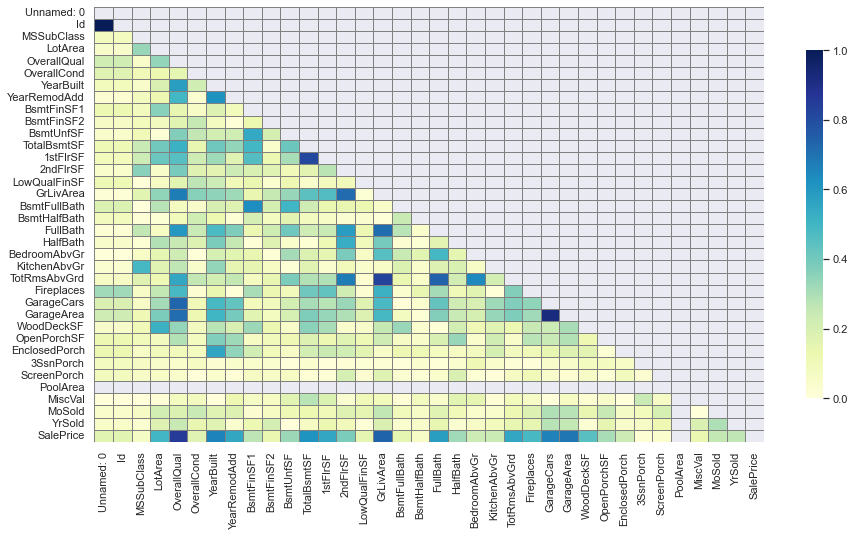

In [7]:
# large heat map 
corr_mat = df_num_train.corr().abs() # represents forced positive only matix of correlations between the numerical features of the Train dataframe
for_fun = corr_mat[[f for f in corr_mat.index if float(corr_mat[f].sort_values(ascending=False)[1:2])>=0.4]]#this line of code takes each column of numerical data that which the second highest value in the column is greater or equal to the value of 0.4
mask = np.triu(np.ones_like(corr_mat, dtype=bool))
plt.figure(figsize=(15,8))
sns.set(font_scale=1)
sns.heatmap(corr_mat, mask=mask, annot=False, linewidths=.75, linecolor="grey", fmt=".2f", cmap='YlGnBu', cbar_kws={"shrink": .8}, vmin=0, vmax=1)
plt.show()

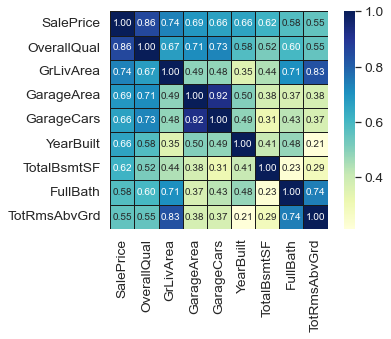

In [8]:
# samll heatmap 
k = 9 #number of variables for heatmap
cols = corr_mat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_num_train[cols].values.T)#.T is important because of how the function works; returns Pearson product-moment correlation coefficents.
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cmap="YlGnBu", linewidths=.75, linecolor="k", cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

With the help of the sorting method used in the code, determining which of the features has the greatest **correlation** with the 'SalePrice' variable is straightforward. In this example, the *five features* that show the greatest level of **correlation** to *'SalePrice'* are: **'OverallQual', 'GrLivArea', 'GarageArea', 'GarageCars', 'YearBuilt', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd'**. We will make the conscious decision to *remove 'OverallQual' and 'GarageCars'* from the model. Overall quality is not a good feature to estimate price on the basis that its deterministic value is a highly subjective and liable to be influenced by perceived value. Having two separate metrics that describe a single attribute (i.e. a garage) is an example of redundancy and will not improve the model. Between the two metrics that are used to describe garages using a continuous data type such as Area, which is measured in square footage, will likely result in a more refined prediction than the integer count of cars.

In [9]:
def spearman(frame, features):
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [frame[f].corr(frame['SalePrice'], 'spearman') for f in features] # spearman is equal to a list of correlation values of every listed column with respect to the 'SalePrice'
    spr = spr.sort_values('spearman') # sorting the result from smallest to largest. maximum range is -1 to 1
    plt.figure(figsize=(15, 0.25*len(features)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h')

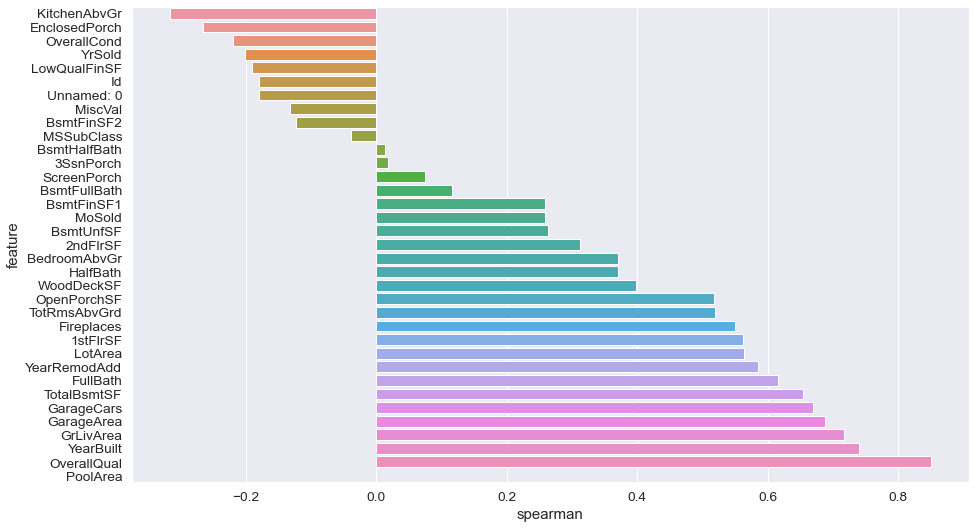

In [10]:
features = corr_mat[['SalePrice']].sort_values(['SalePrice'], ascending=False)
features = [f for f in features.index if f != 'SalePrice']

spearman(df_num_train, features)

In [11]:
df_num_train.drop(['OverallQual'], axis=1, inplace=True)
df_num_train.drop(['GarageCars'], axis=1, inplace=True)


[Back to top](#Index)

## 3. Project Description

Describe, using 150 words or less, how your analysis improves upon the analysis performed by Dr. Williams. Explain the variables that you analyzed, why you selected them, and what relationships you determined in your analysis.
Make sure you explain specifically what findings you derived from your analysis of the data.


**Correlation** is a probability tool that helps researchers make scientific estimates of *dependant variables* from a set of, often recorded, *independent variables*. This is a mathematical procedure that uses **linear regression** to estimate an equation that best explains the measured data given its **distribution**. This is what is meant by the phrase *'training the data'*.

[Back to top](#Index)

### 3.1 Linear Regression

Give a description (500 or less words) of the algorithm you use in this project. Include mathematical and computational details about linear regression.

Include details about the theory (origin of the method, derivation, and formulas) and the necessary steps to implement the algorithm using Python.



A common type of predictive analysis that was used in this project is called **linear regression**.  Linear regression first originated in the early 1800s to predict planetary movement.  In order to determine a good linear fit within a set of data points, a method called least squares linear regression was used.  Using a **line of best fit**, linear regression *estimates and models a relationship between one or more independent variables and the dependant variables*.  The formula for simple linear regression is **y = mx + b**, where y is the dependant variable, x is the independent variable, m is the weight or slope and b is the bias or intercept with the y axis.

The formula to calculate the slope (m) is m = n(∑xy) – (∑x)( ∑y) / n(∑x²)- (∑x)². 

The formula to calculate the intercept with the y axis (b) is b = (∑y)( ∑x²) – (∑x)( ∑xy) / n(∑x²)- (∑x)².

In order to measure the performance of a linear regression model, the **R-squared measurement** is used. R-squared measures the amount of dependant variable variation that is clarified by the independent variables.  

SalePrice was set as the dependant variable Y and dropped from the independent variables X. 
The most **highly correlated variables** to SalePrice were found by *sorting the corr function*. 
The **linear regression model** was then built by importing linear_model from sklearn. 
The *linear_model.LinearRegression()* class was then used to instantiate the linear regression model so it can be implemented. 
The *function fit()* was then used to fit the model according to the given training data. 
After the model was created, the *function predict()* was used to predict class labels for samples in X. 
The *score function* was then used to view the mean accuracy score of the model. A scatter plot was then created to show the **relationship between the prediction values and SalePrice**.

[Back to top](#Index)

### 3.2 Analysis 

Implement the algorithm on your data according to the examples in Video 7.9 and Video 7.10.

Try to improve the results of your model analysis by including a different number of variables in your code for linear regression. Use what you learned about the correlation between variables when you explored your data to help you select these variables.

Compare the results of at least three different groups of variables. In other words, run a linear regression algorithm on at least three different sets of independent variables. How many variables to include in each set is up to you.

For each step, make sure you include your code. Ensure that your code is commented.





[Back to top](#Index)

### 3.3 Results

 What are your **results?** Which model **performed better?** Can you explain why? Include a detailed summary and a description of the metrics used to compute the accuracy of your predictions.

For each step, make sure you include your code. Ensure that your code is commented.



[Back to top](#Index)

### 3.4 Verify Your Model Against Test Data

Now that you have a **prediction model**, it's time to test your model **against test data** to confirm its accuracy on new data. The test data is located in the file `jtest.csv` 

What do you observe? Are these results in accordance with what you found earlier? How can you justify this?

In [12]:
def test_the_model(Train, Test, k, dvs):
    i=0;
    fig=plt.subplots(figsize=(15, 8))
    for n in k:
        i+=1
        my_color_list = ['g','r','b'] # user can select colors for the graphs, must match the number of models 
        nTrain = Train[[col for col in Train.columns if Train[col].dtype == 'int64']]
        corr_mat = nTrain.corr().abs()
        c = corr_mat.nlargest(n, dvs)[dvs].index

        model_set = nTrain[c] 
        Ym = Train[dvs]
        Xm = model_set.drop([dvs], axis=1)
        lr = linear_model.LinearRegression() 
        model = lr.fit(Xm, Ym)
        predictions = model.predict(Xm)
        model_summary = f"Model-{i} produces an R^2 value of: {round(model.score(Xm, Ym),4)}"
        print(model_summary)
        
        plt.subplot(1, len(k), i)
        plt.title(f'Model-{i}: {n} features')
        plt.scatter(predictions, Ym, color=my_color_list[i-1]) # should include a code feature that detects if color list is same length as model length (i)
        plt.hist(Ym - predictions) # histagram of errors

        test_set = Test[c]
        Yt = test_set[dvs]
        Xt = test_set.drop([dvs], axis=1)
        predictions = model.predict(Xt)
        test_summary = f"  testing against Model-{i} yields a calculated accuracy of: {round(model.score(Xt,Yt)*100,2)} %"
        print(test_summary)
        print(" "*math.floor(len(test_summary)*.25),"="*math.floor(len(test_summary)*.5))

Model-1 produces an R^2 value of: 0.7776
  testing against Model-1 yields a calculated accuracy of: 69.27 %
Model-2 produces an R^2 value of: 0.7917
  testing against Model-2 yields a calculated accuracy of: 75.07 %
Model-3 produces an R^2 value of: 0.8511
  testing against Model-3 yields a calculated accuracy of: 75.8 %


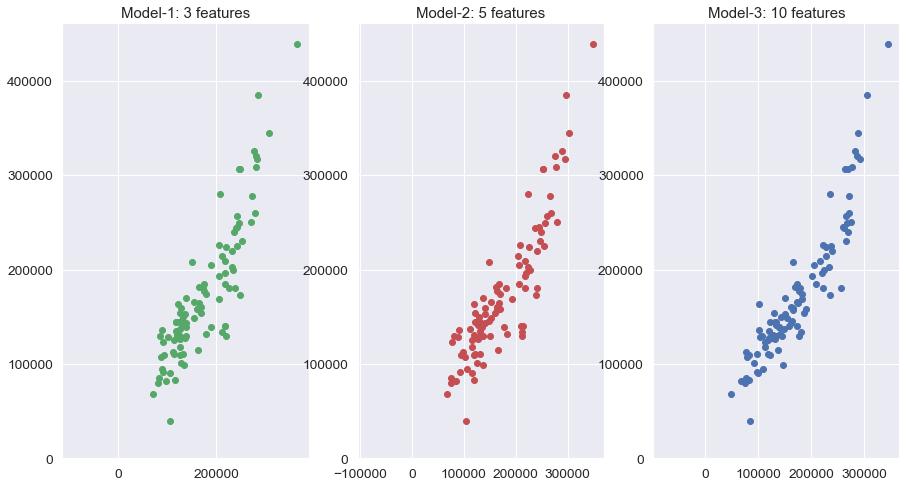

In [13]:
dvs = 'SalePrice'
k=[3,5,10] # number of correlating features to test, also the number of models we will create
test_the_model(df_train, df_test, k, dvs)

[Back to top](#Index)

## Conclusion

Describe your conclusions. Explain which approach worked better in terms of results. What did you learn about data analysis techniques by creating your prediction model?



Of the three models, the model with the most features produces the **higher R-squared value** for both datasets, Train and Test. However, we can see that there is a significant diminishing return. In other words it is very *advantageous* to **increase the number of compared features from three to five**, however, not so much incrementing to ten features. You will note though, for all three models the **R-squared value** will *always be greater* when the prediction model is applied to the *training data rather than the testing data*. This is because the predictions are derived from the values in the Test dataset. Likewise, it is logical that the model utilizing the *greatest number of features* to build a prediction produces the **most accurate prediction** because it takes into consideration more variables contributing to the *Dependant Variable's response*.


[Back to top](#Index
)
## References

Add all references you used to complete this project.

Websites used for historical and mathmatical reference:
- "Linear Regression." Wikipedia. 2022. https://en.wikipedia.org/wiki/Linear_regression#History.
Lu, Kathy. 
- "Visualizing with Seaborn Regplot." Medium. 2019. https://medium.com/@kathy.lu.rentals/visualizing-with-seaborn-regplot-2235ccbaedd4.
Fernando, Jason. 
- "R-Squared." Investopedia. 2021. https://www.investopedia.com/terms/r/r-squared.asp.